In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

In [4]:
df = pd.read_csv("data/AmesHousing.csv",na_values =['','NA'], keep_default_na = False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
df.nunique()

Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64

In [7]:
drop_columns = ['Alley','Pool QC','Pool Area','Misc Feature','Misc Val','Fence','Screen Porch','3Ssn Porch','Enclosed Porch','SalePrice']
drop_columns1 = ['Alley','Pool QC','Pool Area','Misc Feature','Misc Val','Fence','SalePrice']

In [8]:
df_train = df.drop(columns = drop_columns).copy()
df_train_1 = df.drop(columns = drop_columns1)
target = df['SalePrice']

In [9]:
df_train.nunique()
    

Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Open Porch SF      252
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
Length: 72, dtype: int64

In [10]:
df_train.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,6.216041,2007.790444
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,2.714492,1.316613
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,4.000000,2007.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,6.000000,2008.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,8.000000,2009.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,12.000000,2010.000000


array([[<Axes: title={'center': 'Order'}>,
        <Axes: title={'center': 'PID'}>,
        <Axes: title={'center': 'MS SubClass'}>,
        <Axes: title={'center': 'Lot Frontage'}>,
        <Axes: title={'center': 'Lot Area'}>,
        <Axes: title={'center': 'Overall Qual'}>],
       [<Axes: title={'center': 'Overall Cond'}>,
        <Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Year Remod/Add'}>,
        <Axes: title={'center': 'Mas Vnr Area'}>,
        <Axes: title={'center': 'BsmtFin SF 1'}>,
        <Axes: title={'center': 'BsmtFin SF 2'}>],
       [<Axes: title={'center': 'Bsmt Unf SF'}>,
        <Axes: title={'center': 'Total Bsmt SF'}>,
        <Axes: title={'center': '1st Flr SF'}>,
        <Axes: title={'center': '2nd Flr SF'}>,
        <Axes: title={'center': 'Low Qual Fin SF'}>,
        <Axes: title={'center': 'Gr Liv Area'}>],
       [<Axes: title={'center': 'Bsmt Full Bath'}>,
        <Axes: title={'center': 'Bsmt Half Bath'}>,
        <Axes: t

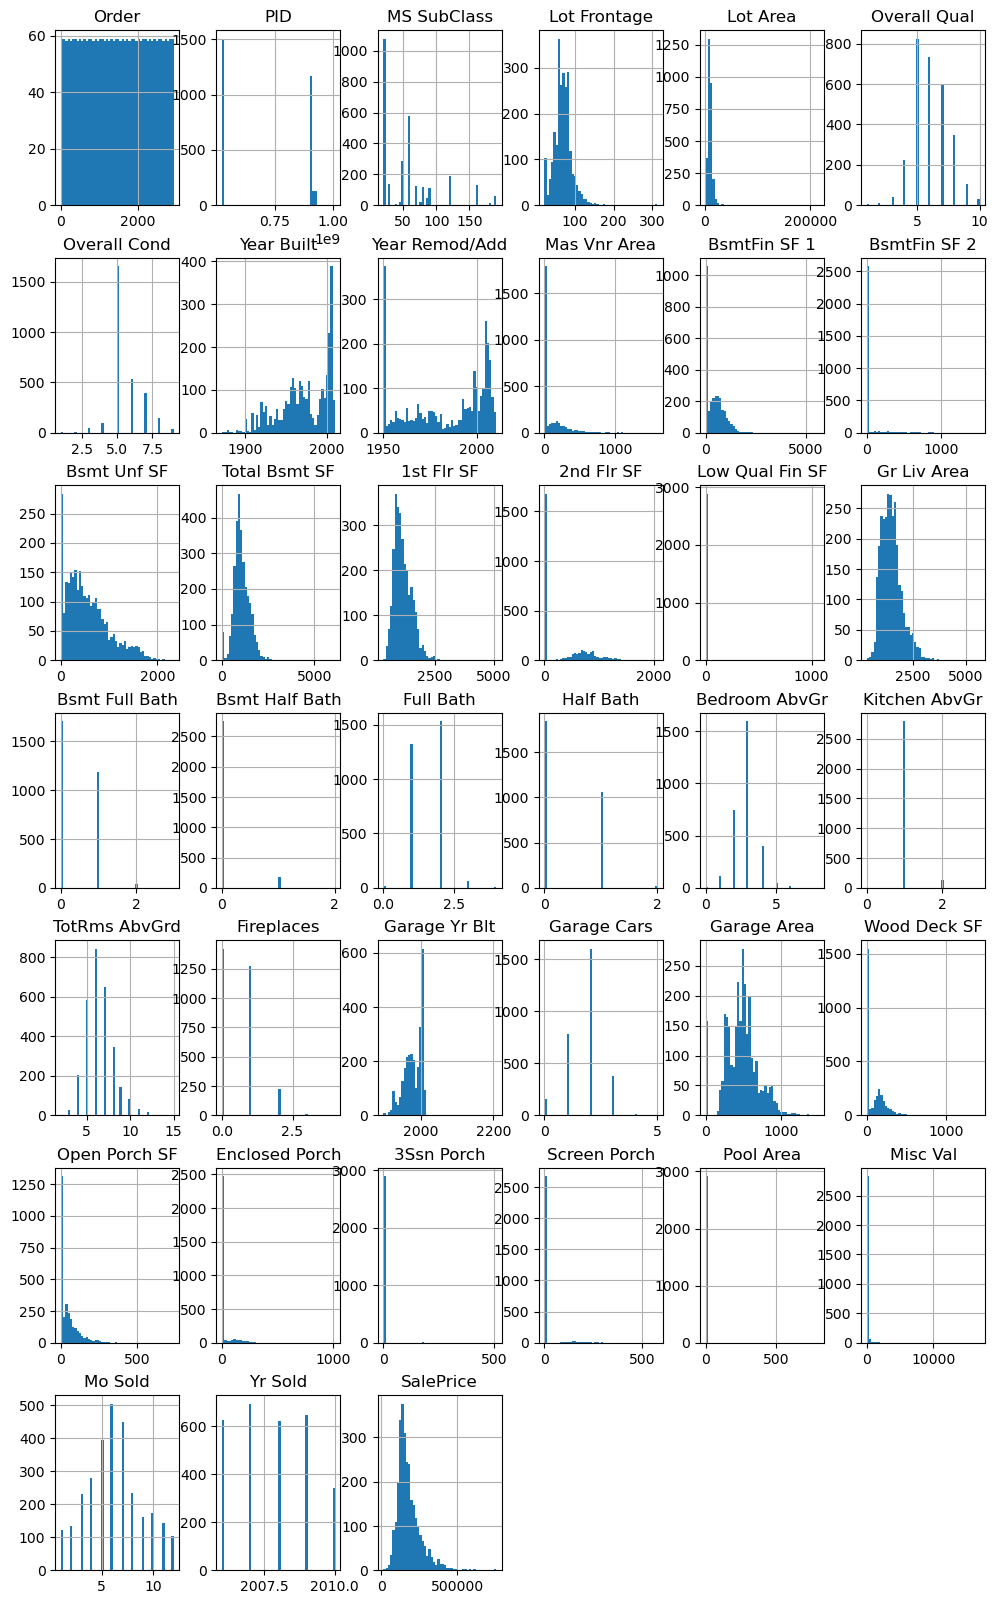

In [11]:
df.hist(bins = 50, figsize = (12,20))

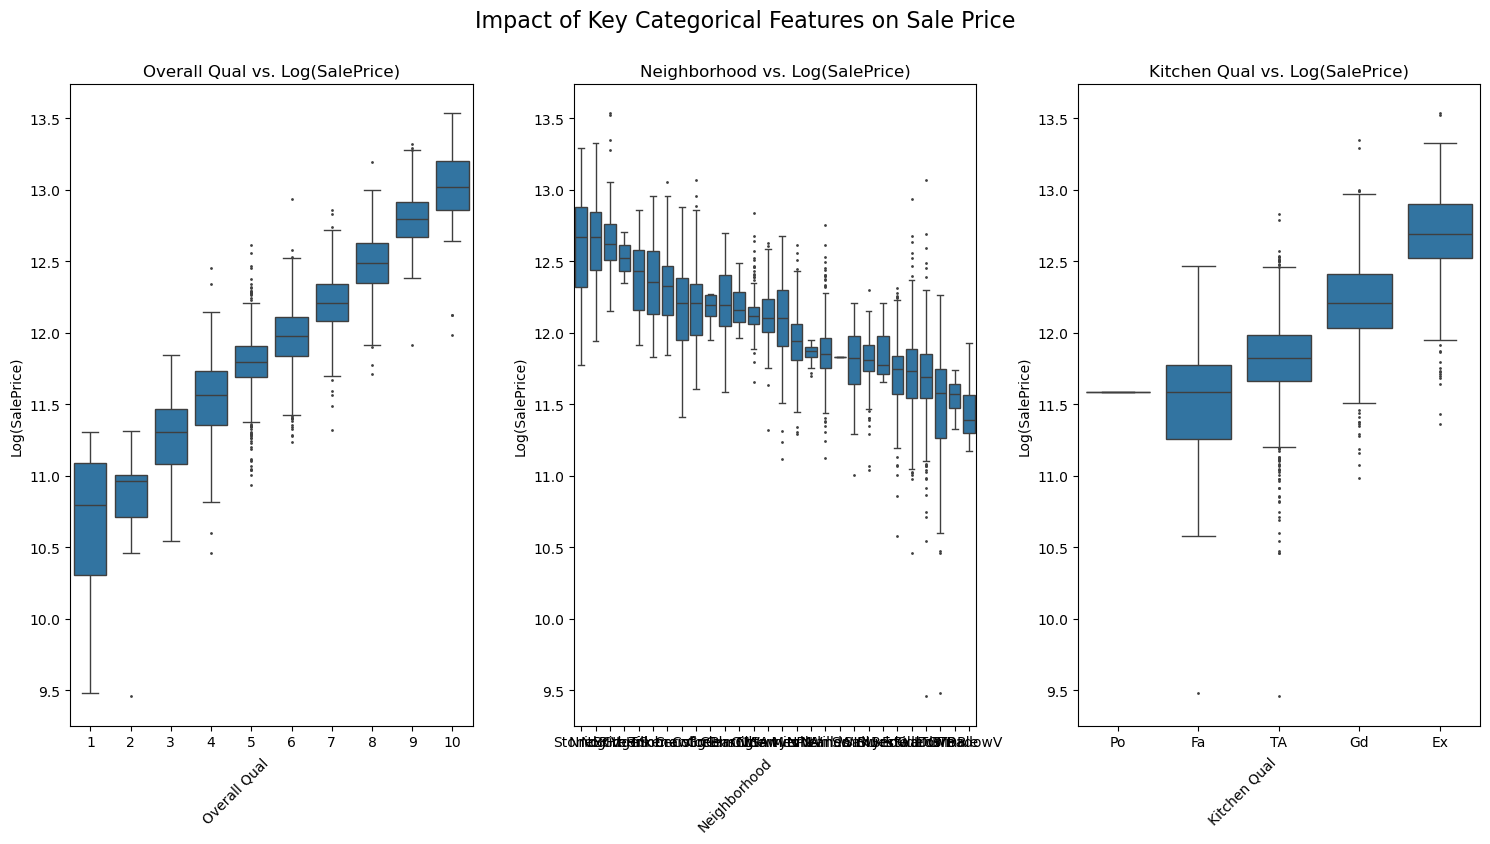

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the simplified dataset


# 1. Prepare the Target Variable (Log-Transformation)
df['SalePrice'] = np.log1p(df['SalePrice'])

# 2. Re-create the key engineered feature 'Total SF'
df['Total SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

# 3. Define features for visualization (a sample of the most influential columns)
numerical_cols_to_plot = ['Gr Liv Area', 'Total SF', 'Lot Area', 'Lot Frontage']
categorical_cols_to_plot = ['Overall Qual', 'Neighborhood', 'Kitchen Qual']

# ----------------------------------------
# Figure 1: Numerical Features vs. SalePrice (Scatter Plots)
# ----------------------------------------
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(2, 2, i + 1)
    # Use Log_SalePrice for clearer linearity
    sns.scatterplot(x=df[col], y=df['SalePrice'])
    plt.title(f'{col} vs. Log(SalePrice)')
    plt.xlabel(col)
    plt.ylabel('Log(SalePrice)')
    plt.tight_layout()
plt.suptitle('Impact of Key Numerical Features on Sale Price', y=1.02, fontsize=16)
plt.savefig('numerical_feature_impact.png')
plt.close()

# ----------------------------------------
# Figure 2: Categorical Features vs. SalePrice (Box Plots)
# ----------------------------------------
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols_to_plot):
    plt.subplot(1, 3, i + 1)
    # Ensure correct order for ordinal data like Overall Qual, Kitchen Qual
    if col in ['Overall Qual', 'Kitchen Qual']:
        if col == 'Overall Qual':
            order = sorted(df['Overall Qual'].unique())
        else: # Kitchen Qual has specific levels
            quality_order = ['Po', 'Fa', 'TA', 'Gd', 'Ex', 'None']
            order = [q for q in quality_order if q in df[col].unique()]
    else:
        # Sort nominal features by median SalePrice for better visualization
        order = df.groupby(col)['SalePrice'].median().sort_values(ascending=False).index

    sns.boxplot(x=df[col], y=df['SalePrice'], order=order, fliersize=1)
    plt.title(f'{col} vs. Log(SalePrice)')
    plt.xlabel(col, rotation=45, ha='right')
    plt.ylabel('Log(SalePrice)')
    plt.tight_layout()

plt.suptitle('Impact of Key Categorical Features on Sale Price', y=1.05, fontsize=16)
plt.savefig('categorical_feature_impact.png')


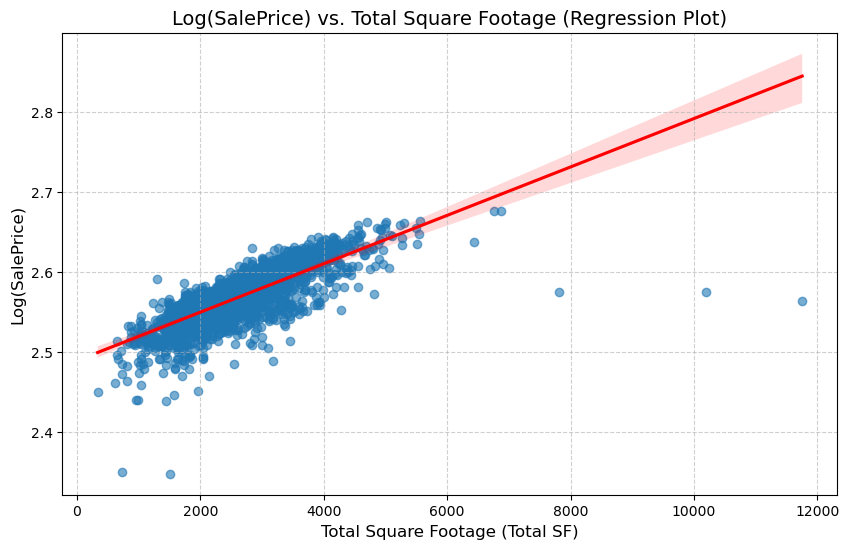

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the simplified dataset (AmesHousing_Simplified_Features.csv)


# 1. Prepare the necessary features
df['Log_SalePrice'] = np.log1p(df['SalePrice'])
df['Total SF'] = df['Total Bsmt SF'] + df['1st Flr SF'] + df['2nd Flr SF']

# 2. Generate the Regression Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Total SF',
    y='Log_SalePrice',
    data=df,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=95  # This parameter controls the confidence interval
)

plt.title('Log(SalePrice) vs. Total Square Footage (Regression Plot)', fontsize=14)
plt.xlabel('Total Square Footage (Total SF)', fontsize=12)
plt.ylabel('Log(SalePrice)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('total_sf_regplot.png')


In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [15]:
df_train['Age'] = df['Yr Sold'] - df['Year Built']
df_train['year_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']

In [16]:
df_train

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Mo Sold,Yr Sold,Sale Type,Sale Condition,Age,year_since_remod
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,...,TA,P,210,62,5,2010,WD,Normal,50,50
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,...,TA,Y,140,0,6,2010,WD,Normal,49,49
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,...,TA,Y,393,36,6,2010,WD,Normal,52,52
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,...,TA,Y,0,0,4,2010,WD,Normal,42,42
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,...,TA,Y,212,34,3,2010,WD,Normal,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,...,TA,Y,120,0,3,2006,WD,Normal,22,22
2926,2927,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,...,TA,Y,164,0,6,2006,WD,Normal,23,23
2927,2928,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,...,NaN,Y,80,32,7,2006,WD,Normal,14,14
2928,2929,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,...,TA,Y,240,38,4,2006,WD,Normal,32,31


In [17]:
# Define the list of highly skewed columns to be transformed (excluding target, already done, and age features)
final_skewed_cols = [
    'Low Qual Fin SF', 'Kitchen AbvGr', 'BsmtFin SF 2', 'Bsmt Half Bath',
    'Mas Vnr Area', 'Open Porch SF', 'Wood Deck SF', 'MS SubClass',
    'Lot Frontage', 'Gr Liv Area', '1st Flr SF', 'Bsmt Unf SF',
    '2nd Flr SF', 'BsmtFin SF 1'
]

# Apply the log1p transformation to each column, overwriting the original values
for col in final_skewed_cols:
    df_train[col] = np.log1p(df[col])

# Check the skewness of a few transformed columns to confirm the effect
# Notice how Mas Vnr Area dropped from 2.60 to 0.54!
print("--- Skewness Check After log1p Transformation ---")
print(df_train[final_skewed_cols].apply(lambda x: x.skew()).head(5).to_string())

# Save the dataset with log-transformed features.
df_train.to_csv("AmesHousing_Log_Transformed_Features.csv", index=False)

--- Skewness Check After log1p Transformation ---
Low Qual Fin SF    8.578846
Kitchen AbvGr      3.530219
BsmtFin SF 2       2.449714
Bsmt Half Bath     3.783687
Mas Vnr Area       0.528999


In [18]:
df1 = df_train[[]]
df1['Sale Price'] = df['SalePrice']

C:\Users\MY LENOVO\AppData\Local\Temp\ipykernel_15548\4086397648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sale Price'] = df['SalePrice']


In [19]:
df1.to_csv("AmesHousing_cleaned_data", index = False)

In [20]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

In [21]:
df1

,Sale Price
0,12.278398
1,11.561725
2,12.055256
3,12.404928
4,12.154258
...,...
2925,11.867104
2926,11.782960
2927,11.790565
2928,12.043560


In [22]:
df1['Sale_price_cat'] = pd.cut(df1['Sale Price'],bins = [9.4550,11.7280,11.8590,12.0910,12.3460, np.inf],labels = [1,2,3,4,5])

C:\Users\MY LENOVO\AppData\Local\Temp\ipykernel_15548\3575860140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sale_price_cat'] = pd.cut(df1['Sale Price'],bins = [9.4550,11.7280,11.8590,12.0910,12.3460, np.inf],labels = [1,2,3,4,5])


In [23]:
for train_index, test_index in split.split(df1,df1['Sale_price_cat']):
    df1.loc[test_index].drop('Sale_price_cat',axis = 1).to_csv('test_input.csv', index = False)
    df1.loc[train_index].drop('Sale_price_cat',axis = 1).to_csv('train_input.csv', index = False)